# Import libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Dataset

In [90]:
df = pd.read_parquet("../raw datasets/playlist_raw.parquet")
df.head(5)

,playlist_idx,name,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,13122,Winter 16/17,2017-10-31,116,115,1,"{'0': '56159', '1': '158741', '2': '130035', '...",84,27464949,112,None
1,885,Country,2017-10-31,193,114,1,"{'0': '220590', '1': '199180', '2': '108648', ...",73,42549856,68,None
2,17788,FALL,2017-10-31,51,48,2,"{'0': '167186', '1': '31002', '2': '117854', '...",34,10589174,47,None
3,5836,happy mix,2017-10-31,75,72,1,"{'0': '217906', '1': '95923', '2': '206234', '...",60,33358703,66,None
4,924,Hype it up,2017-10-31,114,83,1,"{'0': '36171', '1': '75724', '2': '68192', '3'...",57,27651175,52,None


# Check Null Values in each column

In [91]:
print(df.isnull().sum())  

playlist_idx         0
name                 0
modified_at          0
num_tracks           0
num_albums           0
num_followers        0
tracks               0
num_edits            0
duration_ms          0
num_artists          0
description      19086
dtype: int64


# Drop Columns

'description': Since 19,086 of the playlists, out of 20,000 have missing descriptions, it would be better to drop the entire column of descriptions.

In [92]:
df.drop(columns=['description'], inplace=True)

'modified_at': Since our selection of the playlists were based on the most recently modified ones, there are only 2 discrete values, and it does not give any information for our mode, so we are dropping the column

In [93]:
df.drop(columns=['modified_at'], inplace=True)

'num_followers': Since our recommendation system recommends tracks to individual playlists, the number of followers do not directly affect the track that is recommended, so we are dropping the num_followers

In [94]:
df.drop(columns=['num_followers'], inplace=True)

# Convert Units

'duration_ms' is the total duration of the tracks in the playlist. The units are currently in terms of milliseconds, and for better representation, we would be converting it to seconds, and rounding it to the nearest seconds.

In [95]:
df['total_duration'] = df['duration_ms'] // 1000
df = df.drop(columns=['duration_ms']) 

# Check Distribution for numerical columns & Outliers

### Histogram for Continuous

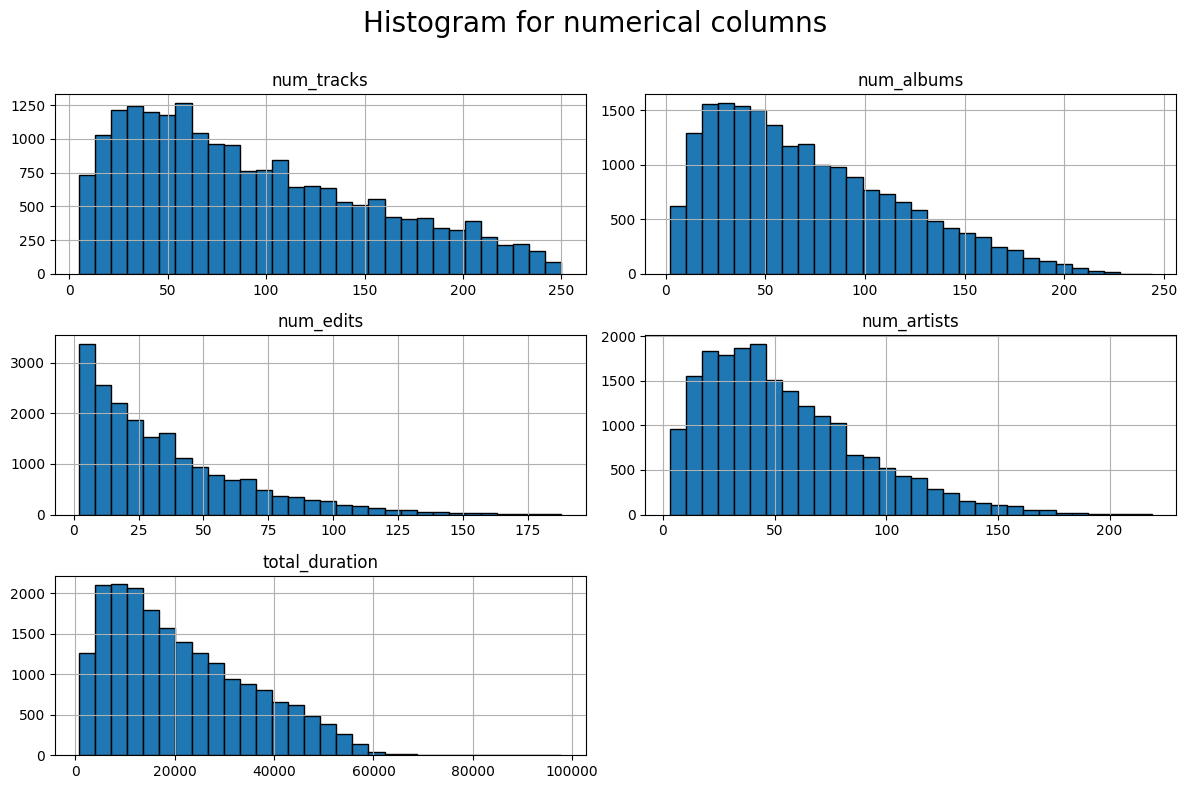

In [96]:
num_cols = df.select_dtypes(include=['number']).drop(columns=['playlist_idx']).columns

df[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')  

plt.suptitle("Histogram for numerical columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

### Boxplots for Continuous

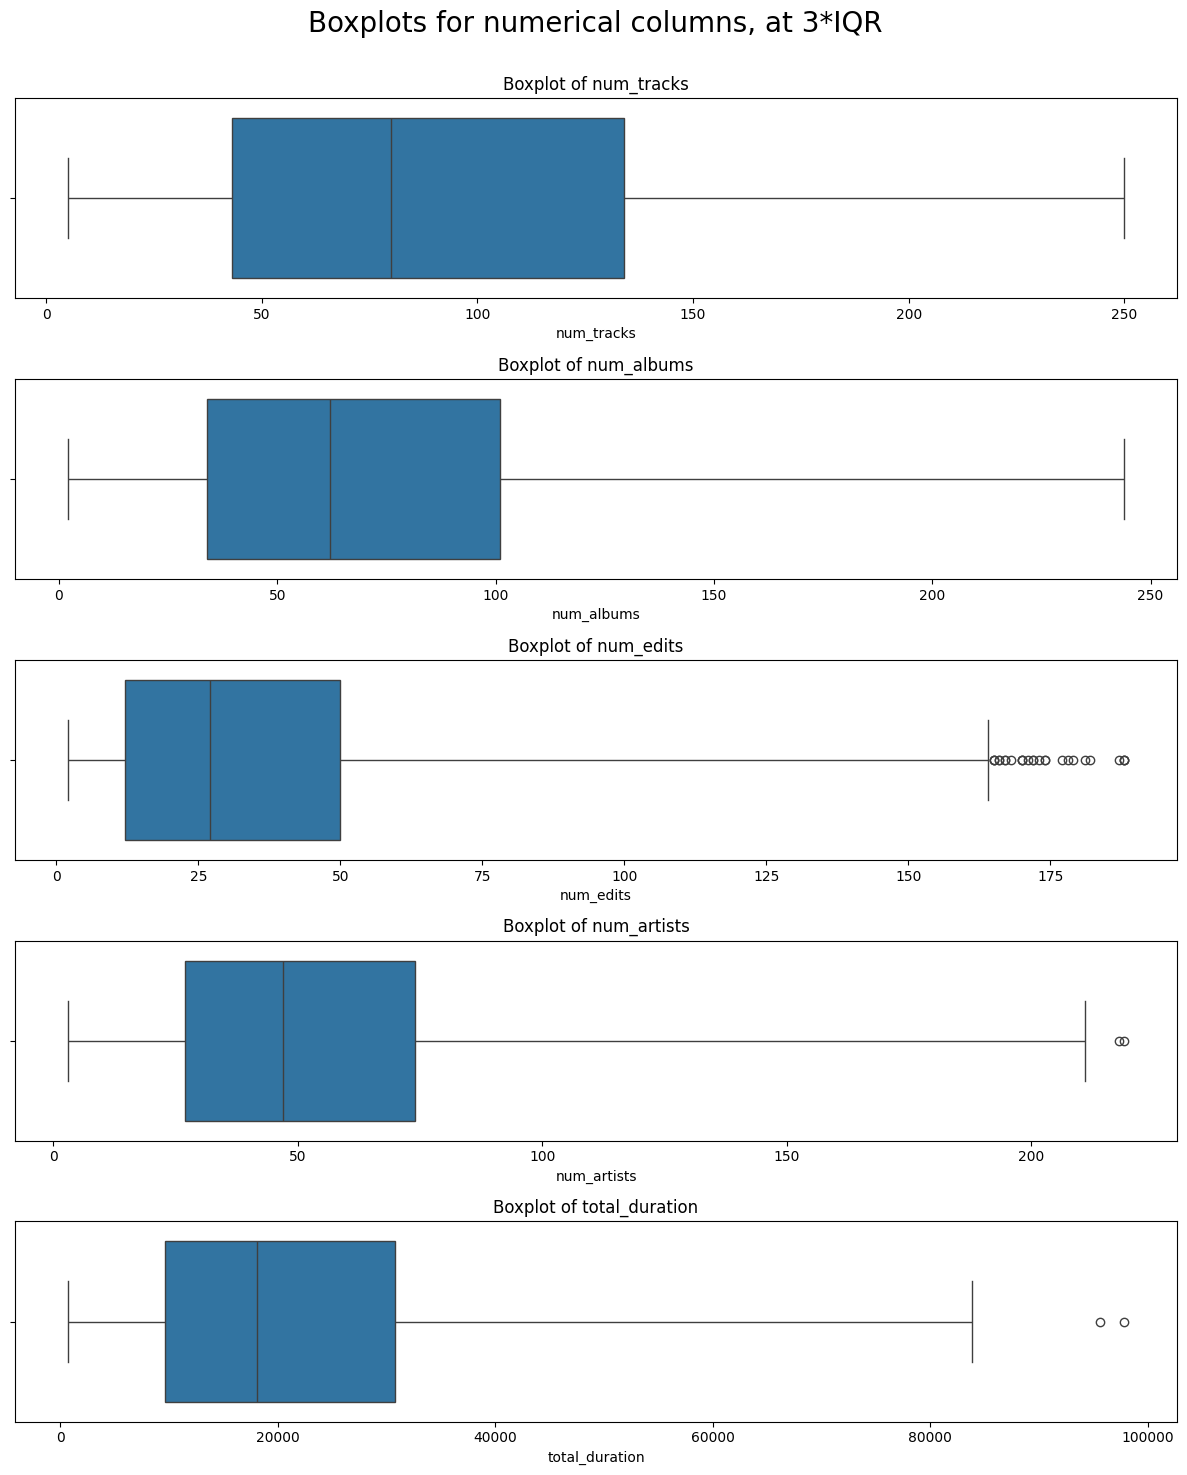

In [97]:
num_cols = df.select_dtypes(include=['number']).drop(columns=['playlist_idx']).columns
plt.figure(figsize=(12, len(num_cols) * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], whis=3)
    plt.title(f'Boxplot of {col}')

plt.suptitle("Boxplots for numerical columns, at 3*IQR", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

Based on the histogram and the boxplots, there are quite a few extreme outliers. However, these are not due to the errors in collecting the data. These are characteristics of a playlist, and represent genuine data points. Furthermore, we would be creating new features by using the average and aggregating some of the columns. As such, we would not be handling outliers at this stage.

# Simple Wordcloud Visualization of Name of Playlists

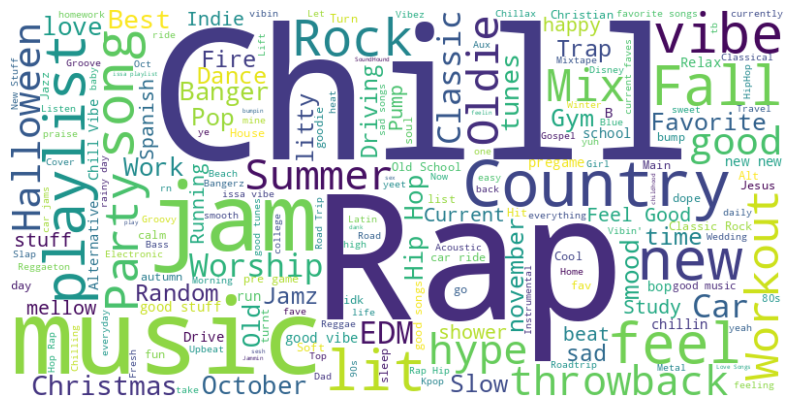

In [98]:
text = ' '.join(df['name'].dropna().astype(str))  

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

# Save Dataset

In [99]:
df_sorted = df.sort_values(by='playlist_idx', ascending=True)
df_sorted.to_parquet('../cleaned dataset/playlist_cleaned.parquet')